# Assignment 1


Cees Gniewyk - 0859034 <br>
Celine Senden - 0865165 <br>
Timothy de Vries - 0740585

# Question 1

### Word embeddings
Build embeddings with a keras implementation where the embedding vector is of length 50, 150 and 300. Use the Alice in Wonderland text book for training.
1. Using the Skipgram model
2. Using CBOW model
3. Analyze the different word embeddings
    - Implement your own function to perform the analogy task with. Do not use existing libraries for this task such as Gensim. Your function should be able to answer whether an anaology as in the example given in the pdf-file is true.
    - Compare the performance on the analogy task between the word embeddings
    - Visualize your results and interpret your results
4. Discuss:
    - What are the main advantages of CBOW and Skipgram?
    - What are the main drawbacks of CBOW and Skipgram?


Own notes: Fix for super frequent words, also implement negative sampling

# Preprocessing

In [36]:
from __future__ import division
import numpy as np
np.random.seed(13) #TODO Check if this is used for sgd
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Reshape, Lambda
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import model_to_dot
from keras.preprocessing import sequence
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors as nn
from itertools import islice
from matplotlib import pylab
import matplotlib.pyplot as plt

In [7]:
# Preprocessing
path = 'alice.txt'
corpus = open(path).readlines()
corpus = [sentence for sentence in corpus if sentence.count(" ") >= 2]      # Remove sentences that are too short
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'+"'")   # Preprocess Sentences with these filters
tokenizer.fit_on_texts(corpus)                                              
corpus = tokenizer.texts_to_sequences(corpus)
nb_samples = sum(len(s) for s in corpus)

## Variables

In [8]:
# Settings for the window and dimensions  
# Dimension of vectors is changed in model design
V = len(tokenizer.word_index) + 1                                           # Length of vocabulary      
window_size = 2                                                             # Size of window next to word

# 1: Training CBOW

In [9]:
                      # Cbow data preprocessing
def generate_data_cbow(corpus, window_size, V):
    center_words = []
    context_words = []
    for sentence in corpus:
        L = len(sentence)
        for index, word in enumerate(sentence):
            p = index - window_size
            n = index + window_size + 1
            for i in range(p, n):
                if i != index and 0 <= i < L:
                    center_words.append(np_utils.to_categorical(word, V))
                    context_words.append(sentence[i])                     
    return (np.array(context_words),np.array(center_words))

                                # Training data for Cbow
x_cbow,y_cbow = generate_data_cbow(corpus,window_size,V)

In [10]:
                               # Design of model for Cbow
dim = 50       #change dimensions of vectors
cbow_50 = Sequential()
cbow_50.add(Embedding(input_dim=V, output_dim=dim, embeddings_initializer='glorot_uniform', input_length=1))
cbow_50.add(Reshape((dim, )))
cbow_50.add(Dense(input_dim=dim, units=V, kernel_initializer='uniform', activation='softmax'))
cbow_50.compile(loss='categorical_crossentropy', optimizer='adadelta')

                                         # Training model
cbow_50.fit(x_cbow, y_cbow, batch_size=128, epochs=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
94556/94556 [==============================] - 16s 171us/step - loss: 7.5094
Epoch 2/10
94556/94556 [==============================] - 15s 159us/step - loss: 6.6829
Epoch 3/10
94556/94556 [==============================] - 18s 186us/step - loss: 6.2766
Epoch 4/10
94556/94556 [==============================] - 17s 182us/step - loss: 6.0974
Epoch 5/10
94556/94556 [==============================] - 16s 174us/step - loss: 5.9937
Epoch 6/10
94556/94556 [==============================] - 16s 170us/step - loss: 5.9234
Epoch 7/10
94556/94556 [==============================] - 15s 156us/step - loss: 5.8715
Epoch 8/10
94556/94556 [==============================] - 15s 157us/step - loss: 5.8312
Epoch 9/10
94556/94556 [==============================] - 16s 170us/step - loss: 5.7980
Epoch 10/10
94556/94556 [==============================] - 17s 175us/step - loss: 5.7695


In [11]:
                               # Design of model for Cbow
dim = 150       #change dimensions of vectors
cbow_150 = Sequential()
cbow_150.add(Embedding(input_dim=V, output_dim=dim, embeddings_initializer='glorot_uniform', input_length=1))
cbow_150.add(Reshape((dim, )))
cbow_150.add(Dense(input_dim=dim, units=V, kernel_initializer='uniform', activation='softmax'))
cbow_150.compile(loss='categorical_crossentropy', optimizer='adadelta')

                                         # Training model
cbow_150.fit(x_cbow, y_cbow, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
94556/94556 [==============================] - 22s 232us/step - loss: 7.4335
Epoch 2/10
94556/94556 [==============================] - 22s 232us/step - loss: 6.5290
Epoch 3/10
94556/94556 [==============================] - 21s 227us/step - loss: 6.1709
Epoch 4/10
94556/94556 [==============================] - 22s 228us/step - loss: 6.0086
Epoch 5/10
94556/94556 [==============================] - 22s 230us/step - loss: 5.9097
Epoch 6/10
94556/94556 [==============================] - 21s 224us/step - loss: 5.8402
Epoch 7/10
94556/94556 [==============================] - 22s 232us/step - loss: 5.7872
Epoch 8/10
94556/94556 [==============================] - 21s 224us/step - loss: 5.7447
Epoch 9/10
94556/94556 [==============================] - 22s 229us/step - loss: 5.7091
Epoch 10/10
94556/94556 [==============================] - 23s 247us/step - loss: 5.6785


In [12]:
                               # Design of model for Cbow
dim = 300       #change dimensions of vectors
cbow_300 = Sequential()
cbow_300.add(Embedding(input_dim=V, output_dim=dim, embeddings_initializer='glorot_uniform', input_length=1))
cbow_300.add(Reshape((dim, )))
cbow_300.add(Dense(input_dim=dim, units=V, kernel_initializer='uniform', activation='softmax'))
cbow_300.compile(loss='categorical_crossentropy', optimizer='adadelta')

                                         # Training model
cbow_300.fit(x_cbow, y_cbow, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
94556/94556 [==============================] - 32s 334us/step - loss: 7.3734
Epoch 2/10
94556/94556 [==============================] - 31s 323us/step - loss: 6.4470
Epoch 3/10
94556/94556 [==============================] - 30s 322us/step - loss: 6.1102
Epoch 4/10
94556/94556 [==============================] - 32s 340us/step - loss: 5.9523
Epoch 5/10
94556/94556 [==============================] - 31s 323us/step - loss: 5.8542
Epoch 6/10
94556/94556 [==============================] - 32s 340us/step - loss: 5.7840
Epoch 7/10
94556/94556 [==============================] - 32s 333us/step - loss: 5.7308
Epoch 8/10
94556/94556 [==============================] - 33s 350us/step - loss: 5.6868
Epoch 9/10
94556/94556 [==============================] - 32s 338us/step - loss: 5.6488
Epoch 10/10
94556/94556 [==============================] - 32s 335us/step - loss: 5.6150


In [13]:
                                             # Writing cbow to file
f = open('vectors_cbow_50.txt' ,'w')
f.write(" ".join([str(V-1),str(dim)]))
f.write("\n")                                                    #
v_cbow_50 = cbow_50.get_weights()[0]                             #
for word, i in tokenizer.word_index.items():                     #
    f.write(word)                                                # 
    f.write(" ")                                                 #
    f.write(" ".join(map(str, list(v_cbow_50[i,:]))))
    f.write("\n")
f.close()

In [14]:
                                             # Writing cbow to file
f = open('vectors_cbow_150.txt' ,'w')
f.write(" ".join([str(V-1),str(dim)]))
f.write("\n")                                                    #
v_cbow_150 = cbow_150.get_weights()[0]                           #
for word, i in tokenizer.word_index.items():                     #
    f.write(word)                                                # 
    f.write(" ")                                                 #
    f.write(" ".join(map(str, list(v_cbow_150[i,:]))))
    f.write("\n")
f.close()

In [15]:
                                             # Writing cbow to file
f = open('vectors_cbow_300.txt' ,'w')
f.write(" ".join([str(V-1),str(dim)]))
f.write("\n")                                                    #
v_cbow_300 = cbow_300.get_weights()[0]                           #
for word, i in tokenizer.word_index.items():                     #
    f.write(word)                                                # 
    f.write(" ")                                                 #
    f.write(" ".join(map(str, list(v_cbow_300[i,:]))))
    f.write("\n")
f.close()

# 2: Training Skipgram

In [16]:
                                        # Skipgram data preprocessing
def generate_data_skipgram(corpus, window_size, V):
    center_words = []
    context_words = []
    for sentence in corpus:
        L = len(sentence)
        for index, word in enumerate(sentence):
            p = index - window_size
            n = index + window_size + 1
            for i in range(p, n):
                if i != index and 0 <= i < L:
                    center_words.append(word)
                    context_words.append(np_utils.to_categorical(sentence[i], V))   
    return (np.array(center_words),np.array(context_words))

                                          # Training data for skipgram
x_skip,y_skip = generate_data_skipgram(corpus,window_size,V)

In [17]:
                               # Design of model for skipgram
dim = 50       #change dimensions of vectors
skipgram_50 = Sequential()
skipgram_50.add(Embedding(input_dim=V, output_dim=dim, embeddings_initializer='glorot_uniform', input_length=1))
skipgram_50.add(Reshape((dim, )))
skipgram_50.add(Dense(input_dim=dim, units=V, kernel_initializer='uniform', activation='softmax'))
skipgram_50.compile(loss='categorical_crossentropy', optimizer='adadelta')

                                         # Training model
skipgram_50.fit(x_skip, y_skip, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
94556/94556 [==============================] - 17s 177us/step - loss: 7.5052
Epoch 2/10
94556/94556 [==============================] - 16s 174us/step - loss: 6.6710
Epoch 3/10
94556/94556 [==============================] - 17s 176us/step - loss: 6.2713
Epoch 4/10
94556/94556 [==============================] - 16s 173us/step - loss: 6.0956
Epoch 5/10
94556/94556 [==============================] - 16s 170us/step - loss: 5.99280s - lo
Epoch 6/10
94556/94556 [==============================] - 17s 175us/step - loss: 5.9234
Epoch 7/10
94556/94556 [==============================] - 16s 174us/step - loss: 5.87250s
Epoch 8/10
94556/94556 [==============================] - 16s 170us/step - loss: 5.8325
Epoch 9/10
94556/94556 [==============================] - 16s 174us/step - loss: 5.7993
Epoch 10/10
94556/94556 [==============================] - 17s 181us/step - loss: 5.7706


In [18]:
                               # Design of model for skipgram
dim = 150       #change dimensions of vectors
skipgram_150 = Sequential()
skipgram_150.add(Embedding(input_dim=V, output_dim=dim, embeddings_initializer='glorot_uniform', input_length=1))
skipgram_150.add(Reshape((dim, )))
skipgram_150.add(Dense(input_dim=dim, units=V, kernel_initializer='uniform', activation='softmax'))
skipgram_150.compile(loss='categorical_crossentropy', optimizer='adadelta')

                                         # Training model
skipgram_150.fit(x_skip, y_skip, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
94556/94556 [==============================] - 23s 238us/step - loss: 7.4331
Epoch 2/10
94556/94556 [==============================] - 22s 232us/step - loss: 6.5340
Epoch 3/10
94556/94556 [==============================] - 22s 231us/step - loss: 6.1743
Epoch 4/10
94556/94556 [==============================] - 22s 230us/step - loss: 6.0113
Epoch 5/10
94556/94556 [==============================] - 24s 249us/step - loss: 5.9117
Epoch 6/10
94556/94556 [==============================] - 22s 228us/step - loss: 5.8420
Epoch 7/10
94556/94556 [==============================] - 22s 229us/step - loss: 5.7891
Epoch 8/10
94556/94556 [==============================] - 22s 237us/step - loss: 5.7463
Epoch 9/10
94556/94556 [==============================] - 23s 246us/step - loss: 5.7109
Epoch 10/10
94556/94556 [==============================] - 22s 237us/step - loss: 5.6803


In [19]:
                               # Design of model for skipgram
dim = 300       #change dimensions of vectors
skipgram_300 = Sequential()
skipgram_300.add(Embedding(input_dim=V, output_dim=dim, embeddings_initializer='glorot_uniform', input_length=1))
skipgram_300.add(Reshape((dim, )))
skipgram_300.add(Dense(input_dim=dim, units=V, kernel_initializer='uniform', activation='softmax'))
skipgram_300.compile(loss='categorical_crossentropy', optimizer='adadelta')

                                         # Training model
skipgram_300.fit(x_skip, y_skip, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
94556/94556 [==============================] - 32s 342us/step - loss: 7.3794
Epoch 2/10
94556/94556 [==============================] - 31s 326us/step - loss: 6.4492
Epoch 3/10
94556/94556 [==============================] - 32s 339us/step - loss: 6.1095
Epoch 4/10
94556/94556 [==============================] - 31s 332us/step - loss: 5.9519
Epoch 5/10
94556/94556 [==============================] - 31s 331us/step - loss: 5.8538
Epoch 6/10
94556/94556 [==============================] - 32s 333us/step - loss: 5.7839
Epoch 7/10
94556/94556 [==============================] - 31s 326us/step - loss: 5.7304
Epoch 8/10
94556/94556 [==============================] - 32s 334us/step - loss: 5.6865
Epoch 9/10
94556/94556 [==============================] - 32s 336us/step - loss: 5.6493
Epoch 10/10
94556/94556 [==============================] - 30s 319us/step - loss: 5.6153


## Saving Embeddings

In [20]:
                                             # Writing skipgram to file
f = open('vectors_skipgram_50.txt' ,'w')
f.write(" ".join([str(V-1),str(dim)]))
f.write("\n")                                                    #
v_skipgram_50 = skipgram_50.get_weights()[0]                     #
for word, i in tokenizer.word_index.items():                     #
    f.write(word)                                                # 
    f.write(" ")                                                 #
    f.write(" ".join(map(str, list(v_skipgram_50[i,:]))))
    f.write("\n")
f.close()

In [21]:
                                             # Writing skipgram to file
f = open('vectors_skipgram_150.txt' ,'w')
f.write(" ".join([str(V-1),str(dim)]))
f.write("\n")                                                    #
v_skipgram_150 = skipgram_150.get_weights()[0]                   #
for word, i in tokenizer.word_index.items():                     #
    f.write(word)                                                # 
    f.write(" ")                                                 #
    f.write(" ".join(map(str, list(v_skipgram_150[i,:]))))
    f.write("\n")
f.close()

In [22]:
                                             # Writing skipgram to file
f = open('vectors_skipgram_300.txt' ,'w')
f.write(" ".join([str(V-1),str(dim)]))
f.write("\n")                                                    #
v_skipgram_300 = skipgram_300.get_weights()[0]                   #
for word, i in tokenizer.word_index.items():                     #
    f.write(word)                                                # 
    f.write(" ")                                                 #
    f.write(" ".join(map(str, list(v_skipgram_300[i,:]))))
    f.write("\n")
f.close()

## Loading Embeddings

In [23]:
#loading previously trained embeddings
path = 'vectors_cbow_50.txt'
corpus = open(path).readlines()


# 3: Testing the models

In [28]:
                                       # function to get the word embedding for word skipgram or cbow
def embed(word, embedding, tokenizer=tokenizer):       
    int_word = tokenizer.texts_to_sequences([word])[0]         # get the index of the word from the tokenizer
    dict_size = embedding.shape[0]                             # get the size of the dictionary from the embedding matrix
    bin_word = np_utils.to_categorical(int_word, dict_size)   # get the one-hot encoding of the word
    
    return np.dot(bin_word, embedding)

#use v_skipgram_50/150/300 for skipgram weights
#Use v_cbow_50/150/300 for cbow weights 


                    #Function to get the text back from the sequency number

reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))
def sequence_to_text(list_of_indices):
    # Looking up words in dictionary
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    return(words)

In [29]:
              #Putting all the models together to make for easier looping
models = []
models.append(v_cbow_50)
models.append(v_cbow_150)
models.append(v_cbow_300)
models.append(v_skipgram_50)
models.append(v_skipgram_150)
models.append(v_skipgram_300)


## Analogy Task

In [30]:
                           # Similar words function for when the word you're inputting is already a word2vec representation

    
def getWordVectorSimularities(word_vect, embedding):
    # get the size of the dictionary from the embedding matrix
    dict_size = embedding.shape[0]
    distances = []
    for idx in range(0, dict_size):
#         np_utils.to_categorical(idx, dict_size)
#         distances.append(np.dot(np_utils.to_categorical(idx, dict_size), embedding))
        distances.append(np.linalg.norm(np.dot(np_utils.to_categorical(idx, dict_size), embedding)-word_vect[0]))
#         print(idx, ": ", np.linalg.norm(np.dot(np_utils.to_categorical(idx, dict_size), embedding)-word_vect))
    return distances

def getWordVectorSimularitiesResults(word_vect, embedding, nr=10):
    scores = getWordVectorSimularities(word_vect, embedding)

    bestscores = np.argsort(scores)[0:nr+2]

    for idx in range(0,len(bestscores)-1):
        print(idx, ": ", sequence_to_text([bestscores[idx]+1])[0], ": ", scores[bestscores[idx]])
        
        
        
            # Similar words function for when you're inputting a word from the vocabulary,
            # that should still be transformed to a vectorspace representation.
def getWordSimularities(word, embedding):
    # get the index of the word from the tokenizer
    int_word = tokenizer.texts_to_sequences([word])[0]
    int_word[:] = [x - 1 for x in int_word]
    # get the size of the dictionary from the embedding matrix
    dict_size = embedding.shape[0]
    # get the one-hot encoding of the word
    bin_word = np_utils.to_categorical(int_word, dict_size)
    # determine vect for word
    word_vect = np.dot(np_utils.to_categorical(int_word, dict_size), embedding)
    return getWordVectorSimularities(word_vect, embedding)

def getWordSimularitiesResults(word, embedding, nr=10):
    scores = getWordSimularities(word, embedding)

    bestscores = np.argsort(scores)[0:nr+2]

    for idx in range(0,len(bestscores)-1):
        print(idx, ": ", sequence_to_text([bestscores[idx]+1])[0], ": ", scores[bestscores[idx]])

In [31]:
                            # Analogy Task for each model by checking whether 
                            # the location of where queen is expected shows the word queen
j = 0
for i in models:
    j+=1
    print("model number: ",j)
    queen = embed('king',i) - embed('man',i) + embed('woman',i)
    getWordVectorSimularitiesResults(queen,i , nr=5)
    print(" ")

model number:  1
0 :  don :  0.36319813
1 :  mock :  0.69409317
2 :  think :  0.7037632
3 :  time :  0.7517176
4 :  such :  0.7704471
5 :  seemed :  0.80904245
 
model number:  2
0 :  don :  0.561582
1 :  think :  0.9558188
2 :  such :  1.0033944
3 :  over :  1.0052252
4 :  seemed :  1.054549
5 :  mock :  1.055033
 
model number:  3
0 :  don :  0.77665424
1 :  such :  1.2193874
2 :  over :  1.2212512
3 :  seemed :  1.2737266
4 :  think :  1.3228489
5 :  time :  1.3580742
 
model number:  4
0 :  don :  0.33614048
1 :  such :  0.65583104
2 :  mock :  0.6853299
3 :  think :  0.6931366
4 :  time :  0.7527705
5 :  seemed :  0.7617359
 
model number:  5
0 :  don :  0.56926006
1 :  such :  0.9790185
2 :  think :  1.0541449
3 :  seemed :  1.0563742
4 :  over :  1.0762706
5 :  mock :  1.0843443
 
model number:  6
0 :  don :  0.83744335
1 :  think :  1.2745898
2 :  over :  1.3083816
3 :  such :  1.3153361
4 :  seemed :  1.3657656
5 :  time :  1.4011027
 


In [32]:
                    #Words that are similar to Queen according to the model
j = 0
for i in models:
    j+=1
    print("model number: ",j)
    getWordSimularitiesResults("Queen",i , nr=5)
    print(" ")

model number:  1
0 :  queen :  0.0
1 :  dear :  0.47556928
2 :  why :  0.53602445
3 :  before :  0.5851684
4 :  there :  0.58598554
5 :  once :  0.60975075
 
model number:  2
0 :  queen :  0.0
1 :  dear :  0.9678885
2 :  why :  1.0330113
3 :  thing :  1.0947698
4 :  sea :  1.110694
5 :  any :  1.1120785
 
model number:  3
0 :  queen :  0.0
1 :  dear :  1.4336433
2 :  thing :  1.4570432
3 :  set :  1.4961959
4 :  gave :  1.5163143
5 :  sea :  1.5173124
 
model number:  4
0 :  queen :  0.0
1 :  dear :  0.5233568
2 :  any :  0.6125474
3 :  why :  0.6377262
4 :  ever :  0.65850425
5 :  beginning :  0.6602052
 
model number:  5
0 :  queen :  0.0
1 :  dear :  0.9621675
2 :  thing :  1.0638562
3 :  ever :  1.1028196
4 :  set :  1.1330773
5 :  sea :  1.1408265
 
model number:  6
0 :  queen :  0.0
1 :  dear :  1.399603
2 :  thing :  1.4211664
3 :  beginning :  1.523625
4 :  ever :  1.5266193
5 :  gave :  1.5430496
 


Showing the 5 most similar words close to where the word queen is expected shows that each model shows similar outputs. However none of them actually show the word queen. <br>
Furthermore, when looking at the words most similar to Queen no words that are shown in the previous query are shown here. Telling us that the analogy task vector is not close to where we expect it to be.

## Visualisations

In [33]:
# create vector files for both skipgram and cbow, formatted to be taken by http://projector.tensorflow.org/ for visualization

#Alter these files by changing the value for 50 to 150 and 300 to get the other models
visualizedskipgram = v_skipgram_50
visualizedcbow = v_cbow_50


f = open('vectors_skipgram.txt' ,'w')
f2 = open('vectornames_skipgram.txt' ,'w')


for word, i in tokenizer.word_index.items():
    #f.write(word)
    #f.write(" ")
    f.write('\t'.join(map(str, list(visualizedskipgram[i,:]))))
    f.write("\n")
    f2.write(word)
    f2.write("\n")
f.close()

g = open('vectors_cbow.txt' ,'w')
g2 = open('vectornames_cbow.txt' ,'w')
for word, i in tokenizer.word_index.items():
    g.write('\t'.join(map(str, list(visualizedcbow[i,:]))))
    g.write("\n")
    g2.write(word)
    g2.write("\n")
g.close()

The visualisations showed that the clusters didn't look as expected, there is a lot of noise.<br>
For neither the cbow or the skipgram could the semantic value of the words be shown in clusters.

In [37]:
def tsne_plot(model):
    "Creates TSNE model and plots it"
    labels = []
    tokens = []
    
    vectors = model
    counter = 0
    for word, i in tokenizer.word_index.items():
        counter += 1
        if counter >= 150:
            break
        tokens.append(vectors[i])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=35, n_components=2, init='pca', random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

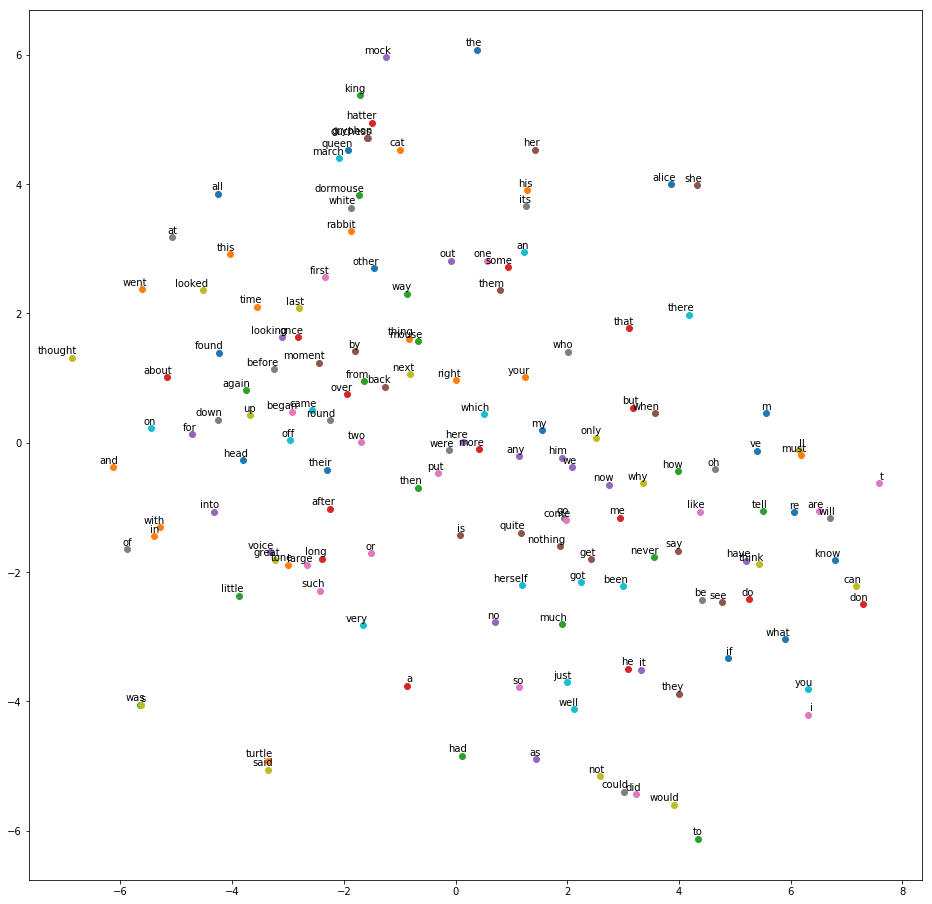

In [38]:
tsne_plot(v_cbow_50) 

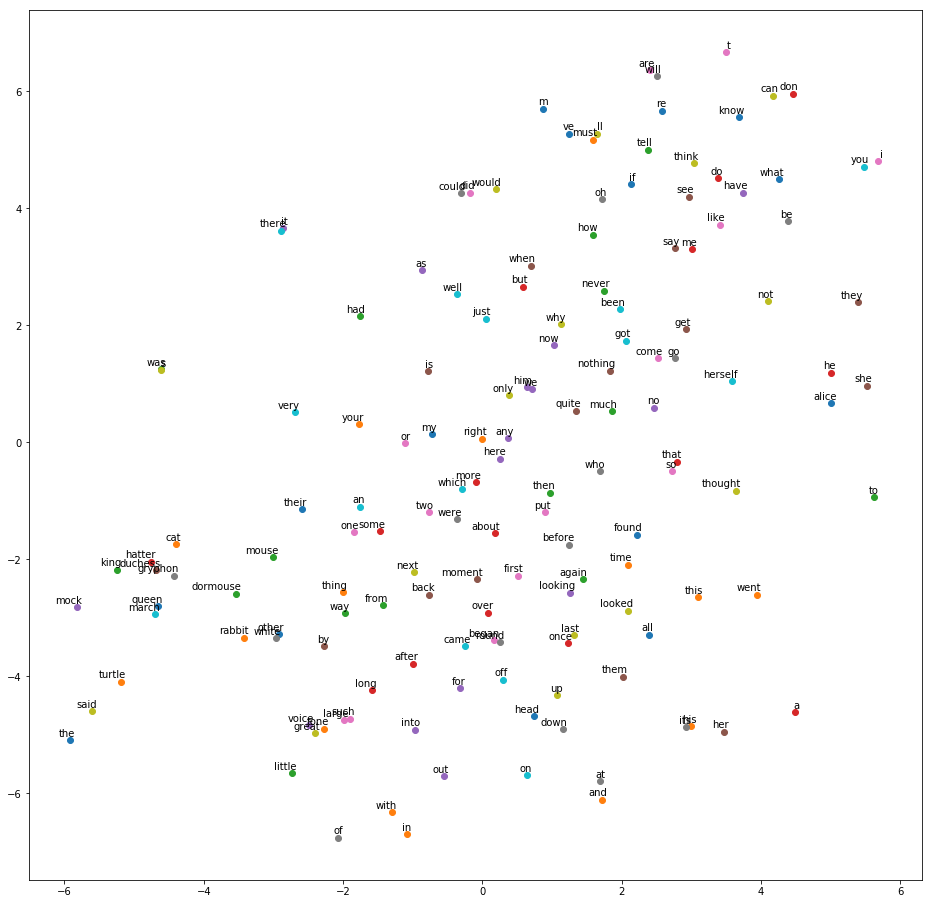

In [39]:
tsne_plot(v_skipgram_50) 

The plots that can be generated by using PCA show some minor clusters, for instance "queen" and "king" are close together. <br> Similarly "rabbit" and "white" are together. <br>
Furthermore, "she" and "alice" are close together, which makes sense. <br>
In both  plots dormouse and mouse are not far apart. <br>
So the PCA plots were able to show more features than the 3d vectorspace model.

# 4: Discussion

### Advantages
The main advantages of both the CBOW and the Skipgram is that semantic meanings of words can be derived in a computationally less expensive way compared to the feedforward NNLM. It is possible to train high quality word vectors with much simpler models. A larger dataset can be used since it is computationally less expensive. <br>
<b>Skipgram </b> models work well with small amount of training data, it can even represent rare words well. <br>
    <b>CBOW </b> is several times faster to train than the skipgram model and literature tells us that it has a higher accuracy for frequent words. <br>
Since our dataset was small, the speed difference could not be seen, nor the improved accuracy.
### Drawbacks
The simple method of cbow and skipgram doesn't take into account phrases or words that belong together such as "Air Canada" <br>
Furthermore, it becomes computationally expensive without impact, since it is training weights for words that are not involved with the context words. <br>
The author of the original paper published a new paper with improvement steps, one is regarding a <b>hierarchical softmax</b>, that uses a tree-like structure to not update all weights, but instead only updates the weights of nodes that are close. <br>
Another improvement step is by using <b>negative sampling</b>, effectively changing the problem to a binary classification task by only using a small sample of all training data and deliberately sampling pairs that are not close to the context words. The weights are only changed for the sampled values

# Comparison to Pre-trained Glove 

When comparing the analogy task to a pre-trained model by glove it can be seen that the analogy task works better. <br>
By using a larger set of words the model can be trained to be more precise.

In [40]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_input_file="glove.6B.100d.txt", word2vec_output_file="gensim_glove_vectors.txt")

(400001, 100)

In [ ]:
from gensim.models.keyedvectors import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("gensim_glove_vectors.txt", binary=False)

In [ ]:
glove_model.wv.most_similar("queen",topn=10)

In [ ]:
queen = glove_model.wv.get_vector("king") - glove_model.wv.get_vector("man") + glove_model.wv.get_vector("woman") 

In [ ]:
glove_model.wv.similar_by_vector(queen,topn=10)

These results show that by using the analogy task the vector for queen can be found pretty closely, however king is still ranked higher. <br>
In the rest of the top 10 similar words it can be seen that the cluster is made around words that can be found in monarchy.